In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dogs-vs-cats.zip

Archive:  /content/drive/MyDrive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [3]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [4]:
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

Replicating images to training, validation, and test directories

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=667, end_index=1667)
make_subset("validation", start_index=1668, end_index=2168)
make_subset("test", start_index=2169, end_index=2669)

Making Use of image_dataset_from_directory To understand pictures

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_d = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_d = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_d = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Preparing data

In [7]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [8]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [9]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [10]:
reshaped_d = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_d):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [11]:
for data_batch, labels_batch in train_d:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Building model

Activating a small convnet for dogs vs. cats categorizing

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Setting up the model for training

In [13]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

Presenting the data's shapes and the labels the dataset produced

Model Fitting with a Dataset

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_d,
    epochs=100,
    validation_data=validation_d,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 9s 33ms/step - loss: 0.6962 - accuracy: 0.5230 - val_loss: 0.6859 - val_accuracy: 0.5490
Epoch 2/100
63/63 [==============================] - 1s 16ms/step - loss: 0.6946 - accuracy: 0.5220 - val_loss: 0.6970 - val_accuracy: 0.5010
Epoch 3/100
63/63 [==============================] - 1s 15ms/step - loss: 0.6827 - accuracy: 0.5655 - val_loss: 0.7487 - val_accuracy: 0.5190
Epoch 4/100
63/63 [==============================] - 1s 17ms/step - loss: 0.6485 - accuracy: 0.6335 - val_loss: 0.6370 - val_accuracy: 0.6330
Epoch 5/100
63/63 [==============================] - 1s 15ms/step - loss: 0.6215 - accuracy: 0.6580 - val_loss: 0.6546 - val_accuracy: 0.6230
Epoch 6/100
63/63 [==============================] - 1s 17ms/step - loss: 0.5948 - accuracy: 0.6940 - val_loss: 0.6252 - val_accuracy: 0.6770
Epoch 7/100
63/63 [==============================] - 1s 17ms/step - loss: 0.5710 - accuracy: 0.7100 - val_loss: 0.6124 - val_accuracy: 0.6850
Epoch 

showing the accuracy and loss curves when training

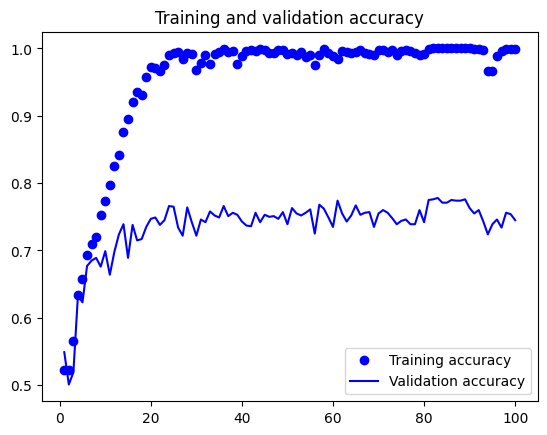

<Figure size 640x480 with 0 Axes>

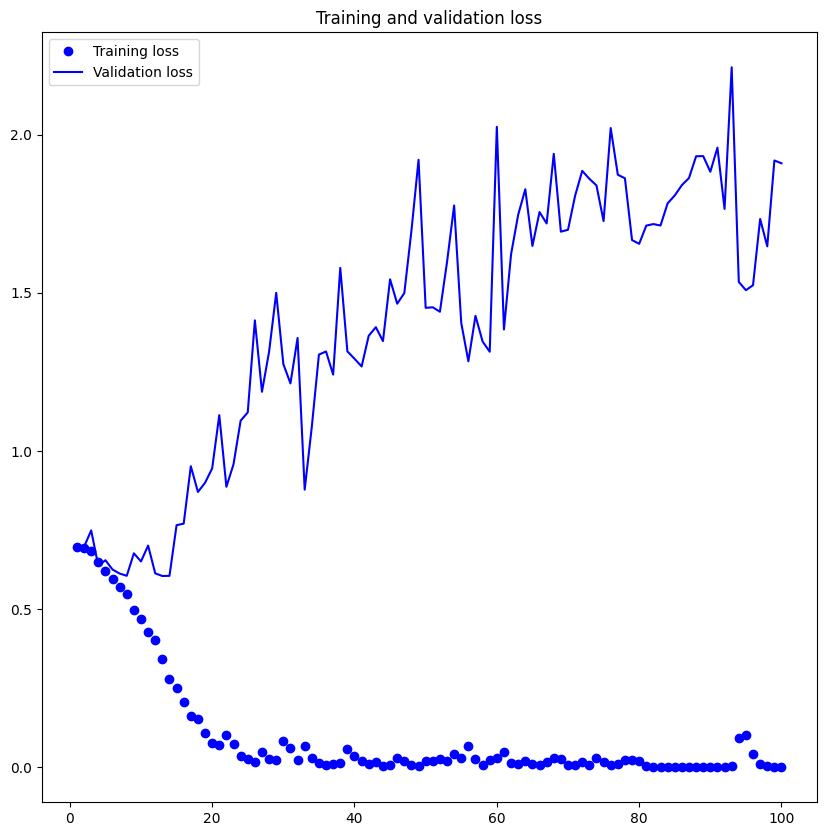

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Model evaluation using the test set

In [17]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_d)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.5720 - accuracy: 0.7460
Test accuracy: 0.746


Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

By means of data augmentation

Establish a step for data augmentation to be added to an image model.

In [18]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2167)
make_subset("validation", start_index=2168, end_index=2668)
make_subset("test", start_index=2669, end_index=3168)

In [19]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Presentinga a few augmented training images

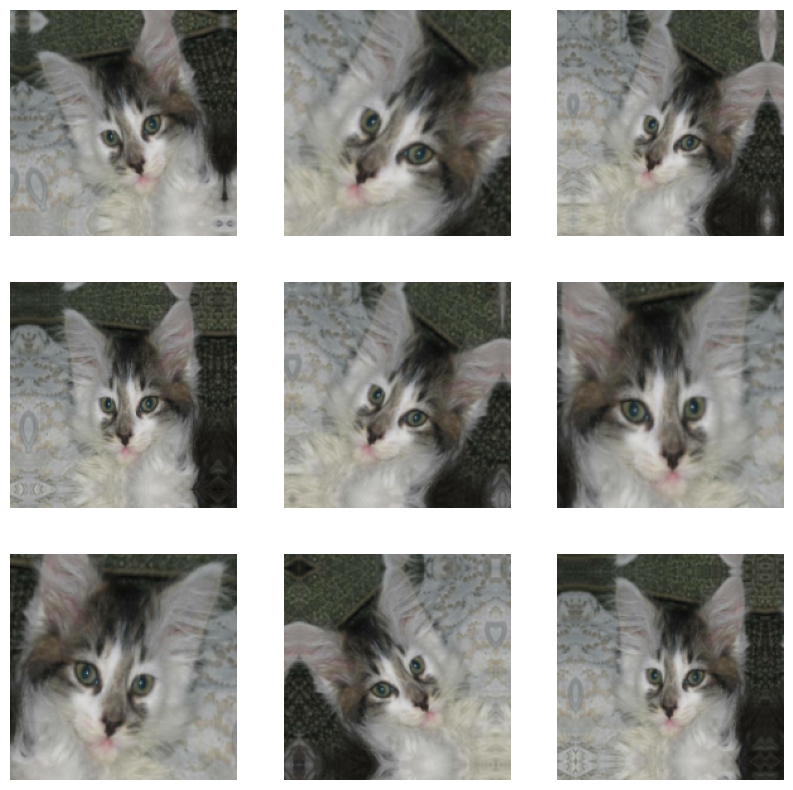

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_d.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Determining a new convnet that includes image augmentation and dropout

In [24]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Training the regularized convnet

In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_d,
    epochs=200,
    validation_data=validation_d,
    callbacks=callbacks)

Epoch 1/200
63/63 [==============================] - 4s 22ms/step - loss: 0.6939 - accuracy: 0.5205 - val_loss: 0.6912 - val_accuracy: 0.6010
Epoch 2/200
63/63 [==============================] - 1s 19ms/step - loss: 0.6894 - accuracy: 0.5335 - val_loss: 0.6825 - val_accuracy: 0.5780
Epoch 3/200
63/63 [==============================] - 1s 18ms/step - loss: 0.6755 - accuracy: 0.5815 - val_loss: 0.6929 - val_accuracy: 0.5650
Epoch 4/200
63/63 [==============================] - 1s 19ms/step - loss: 0.6549 - accuracy: 0.6160 - val_loss: 0.6644 - val_accuracy: 0.5750
Epoch 5/200
63/63 [==============================] - 1s 19ms/step - loss: 0.6532 - accuracy: 0.6285 - val_loss: 0.6206 - val_accuracy: 0.6690
Epoch 6/200
63/63 [==============================] - 1s 17ms/step - loss: 0.6442 - accuracy: 0.6405 - val_loss: 0.6432 - val_accuracy: 0.6590
Epoch 7/200
63/63 [==============================] - 1s 17ms/step - loss: 0.6294 - accuracy: 0.6570 - val_loss: 0.6387 - val_accuracy: 0.6600
Epoch 

Assessing the model using the test dataset

In [26]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_d)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.4404 - accuracy: 0.8220
Test accuracy: 0.822


Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

Step 3 Built with test sets with 500 samples and 2000 training samples that were validated. My findings indicate that test accuracy is greater with 1500 photos as compared to training samples of 1000 and 2000 photos.
The accuracy of training increases with 1000 training samples.
increasing the training sample size to 2000 while keeping the validation and test sets with 500 samples each.

In [27]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2667)
make_subset("validation", start_index=2668, end_index=3168)
make_subset("test", start_index=3169, end_index=3669)

A new convolution with increased training samples,image augmentation and dropout

In [28]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [29]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_d,
    epochs=150,
    validation_data=validation_d,
    callbacks=callbacks)

Epoch 1/150
63/63 [==============================] - 4s 21ms/step - loss: 0.6944 - accuracy: 0.5210 - val_loss: 0.6915 - val_accuracy: 0.5420
Epoch 2/150
63/63 [==============================] - 1s 19ms/step - loss: 0.6866 - accuracy: 0.5505 - val_loss: 0.6705 - val_accuracy: 0.5820
Epoch 3/150
63/63 [==============================] - 1s 19ms/step - loss: 0.6579 - accuracy: 0.6210 - val_loss: 0.6551 - val_accuracy: 0.5970
Epoch 4/150
63/63 [==============================] - 1s 17ms/step - loss: 0.6688 - accuracy: 0.5830 - val_loss: 0.6681 - val_accuracy: 0.6330
Epoch 5/150
63/63 [==============================] - 1s 18ms/step - loss: 0.6415 - accuracy: 0.6415 - val_loss: 0.6267 - val_accuracy: 0.6630
Epoch 6/150
63/63 [==============================] - 1s 17ms/step - loss: 0.6309 - accuracy: 0.6580 - val_loss: 0.6327 - val_accuracy: 0.6390
Epoch 7/150
63/63 [==============================] - 1s 19ms/step - loss: 0.6238 - accuracy: 0.6585 - val_loss: 0.6056 - val_accuracy: 0.6860
Epoch 

In [30]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_d)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.4678 - accuracy: 0.8100
Test accuracy: 0.810


Activating the VGG16 convolutional base

In [31]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [32]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Applying a pretrained model without data augmentation to extract features

Identifying the labels that correspond with the VGG16 traits

In [33]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_d)
val_features, val_labels =  get_features_and_labels(validation_d)
test_features, test_labels =  get_features_and_labels(test_d)

1/1 [==============================] - 0s 22ms/step


In [34]:
train_features.shape

(2000, 5, 5, 512)

In [35]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 18.7030 - accuracy: 0.9260 - val_loss: 49.1356 - val_accuracy: 0.8390
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 4.7846 - accuracy: 0.9700 - val_loss: 5.0623 - val_accuracy: 0.9700
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 2.4910 - accuracy: 0.9850 - val_loss: 4.9228 - val_accuracy: 0.9750
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9411 - accuracy: 0.9915 - val_loss: 8.9135 - val_accuracy: 0.9580
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4159 - accuracy: 0.9965 - val_loss: 4.8837 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0763 - accuracy: 0.9940 - val_loss: 3.6202 - val_accuracy: 0.9790
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7714 - accuracy: 0.9940 - val_loss: 4.7547 - val_accuracy: 0.9790
Epoch 8/20
63/63 

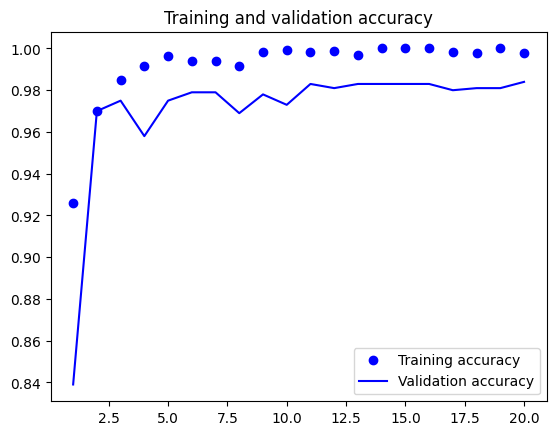

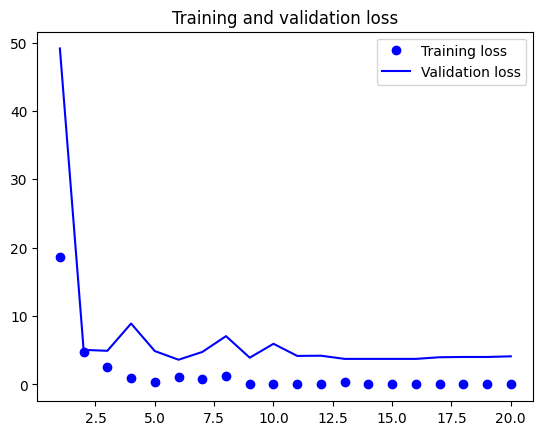

In [36]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

VGG16 convolutional base instantiation and freezing

In [37]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [38]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [39]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


Model is now performing with a classifier and agumentation to convulation base

In [40]:

augmentation2 = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)
input22 = keras.Input(shape=(180, 180, 3))
x1 = augmentation2(input22)
x1 =keras.layers.Lambda(
 lambda x: keras.applications.vgg16.preprocess_input(x))(x1)
x1 = conv_base(x1)
x1 = layers.Flatten()(x1)
x1 = layers.Dense(256)(x1)
x1 = layers.Dropout(0.5)(x1)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model = keras.Model(input22, outputs)
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])


In [41]:

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="features_extraction_with_augmentation2.keras",
 save_best_only=True,
 monitor="val_loss"
 )
]
history = model.fit(
 train_d,
 epochs=10,
 validation_data=validation_d,
 callbacks=callbacks
)

Epoch 1/10
63/63 [==============================] - 4s 38ms/step - loss: 17.4422 - accuracy: 0.8995 - val_loss: 2.2354 - val_accuracy: 0.9810
Epoch 2/10
63/63 [==============================] - 2s 28ms/step - loss: 7.2916 - accuracy: 0.9410 - val_loss: 2.5851 - val_accuracy: 0.9740
Epoch 3/10
63/63 [==============================] - 2s 29ms/step - loss: 6.4871 - accuracy: 0.9505 - val_loss: 3.1868 - val_accuracy: 0.9740
Epoch 4/10
63/63 [==============================] - 2s 28ms/step - loss: 5.6173 - accuracy: 0.9630 - val_loss: 3.0672 - val_accuracy: 0.9780
Epoch 5/10
63/63 [==============================] - 2s 35ms/step - loss: 3.9459 - accuracy: 0.9645 - val_loss: 2.0509 - val_accuracy: 0.9820
Epoch 6/10
63/63 [==============================] - 2s 28ms/step - loss: 3.4628 - accuracy: 0.9670 - val_loss: 5.3865 - val_accuracy: 0.9690
Epoch 7/10
63/63 [==============================] - 2s 28ms/step - loss: 2.9879 - accuracy: 0.9705 - val_loss: 15.8568 - val_accuracy: 0.9330
Epoch 8/10


In [42]:
test_model = keras.models.load_model(
 "features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = test_model.evaluate(test_d)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 17ms/step - loss: 6.4251 - accuracy: 0.9670
Test accuracy: 0.967


Perfecting a previously trained model


All layers being frozen up until the fourth from the bottom

In [43]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False

In [44]:

model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
 metrics=["accuracy"])
callbackstu = [
 keras.callbacks.ModelCheckpoint(
 filepath="fine_tuning.keras",
 save_best_only=True,
 monitor="val_loss")
]
historytune = model.fit(
 train_d,
 epochs=30,
 validation_data=validation_d,
 callbacks=callbackstu)

Epoch 1/30
63/63 [==============================] - 4s 39ms/step - loss: 1.3603 - accuracy: 0.9820 - val_loss: 3.0412 - val_accuracy: 0.9770
Epoch 2/30
63/63 [==============================] - 2s 34ms/step - loss: 1.1055 - accuracy: 0.9840 - val_loss: 1.7476 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 2s 26ms/step - loss: 0.9743 - accuracy: 0.9855 - val_loss: 1.7549 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 2s 35ms/step - loss: 0.9857 - accuracy: 0.9820 - val_loss: 1.5976 - val_accuracy: 0.9780
Epoch 5/30
63/63 [==============================] - 2s 26ms/step - loss: 0.6873 - accuracy: 0.9855 - val_loss: 1.6037 - val_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 2s 26ms/step - loss: 0.3517 - accuracy: 0.9895 - val_loss: 1.6831 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 2s 26ms/step - loss: 0.6371 - accuracy: 0.9865 - val_loss: 1.6452 - val_accuracy: 0.9810
Epoch 8/30
63

In [45]:

model_tuning = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = model.evaluate(test_d)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 2.8877 - accuracy: 0.9700
Test accuracy: 0.970
